In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")
from scipy import stats

### Reading tables with Akita V1 and V2 prediction quality metrics (MSE, Spearman correlation)

In [2]:
# reading tables 
v1_results = pd.read_csv("./data/v1_results.tsv", sep='\t')
v2_results = pd.read_csv("./data/v2_results.tsv", sep='\t')

# merging tables
df = pd.merge(v1_results, v2_results, on=["chr", "start", "stop"])

### Plotting MSE vs. Spearman for both models

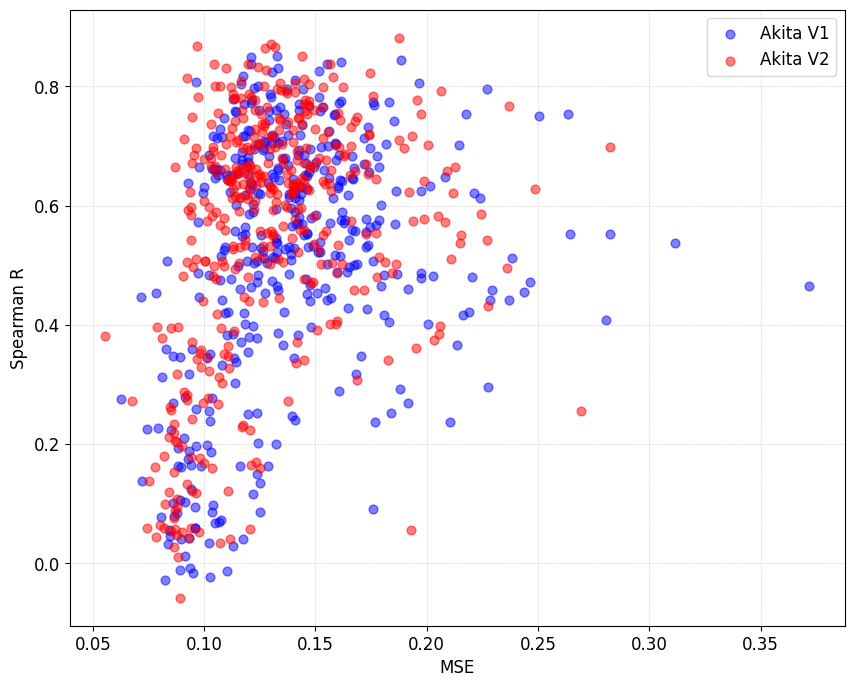

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df["v1_MSE"], df["v1_S"], alpha=0.5, s=40, edgecolors='b', c='blue', label="Akita V1")
ax.scatter(df["v2_MSE"], df["v2_S"], alpha=0.5, s=40, edgecolors='r', c='red', label="Akita V2")

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

ax.set_xlabel("MSE")
ax.set_ylabel("Spearman R")

ax.legend()
# plt.savefig("./plots/spearman_vs_mse_akita_v1_v2.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Statistics

In [4]:
print("MSE")
print("- AkitaV1")
print("\tmean = ", np.mean(df["v1_MSE"]))
print("\tmedian = ", np.median(df["v1_MSE"]))
print("- AkitaV2")
print("\tmean = ", np.mean(df["v2_MSE"]))
print("\tmedian = ", np.median(df["v2_MSE"]))

MSE
- AkitaV1
	mean =  0.1390826592625
	median =  0.13280882
- AkitaV2
	mean =  0.13087205595
	median =  0.125250995


In [5]:
print("Spearman correlation")
print("- AkitaV1")
print("\tmean = ", np.mean(df["v1_S"]))
print("\tmedian = ", np.median(df["v1_S"]))
print("- AkitaV2")
print("\tmean = ", np.mean(df["v2_S"]))
print("\tmedian = ", np.median(df["v2_S"]))

Spearman correlation
- AkitaV1
	mean =  0.5141589752455575
	median =  0.5531928331267933
- AkitaV2
	mean =  0.5519038361105033
	median =  0.6204250305601359


### Plotting with highlighting two points (no and remarkable performance improvement)

In [6]:
# very close to diagonal (no improvement) -> chr1:73918464-74967040 (in magenta)
# much better performance -> chr9:132390912-133439488 (in green)

highlight_point_1 = df[(df['chr'] == "chr1") & (df['start'] == 73918464) & (df['stop'] == 74967040)]
highlight_point_2 = df[(df['chr'] == "chr9") & (df['start'] == 132390912) & (df['stop'] == 133439488)]

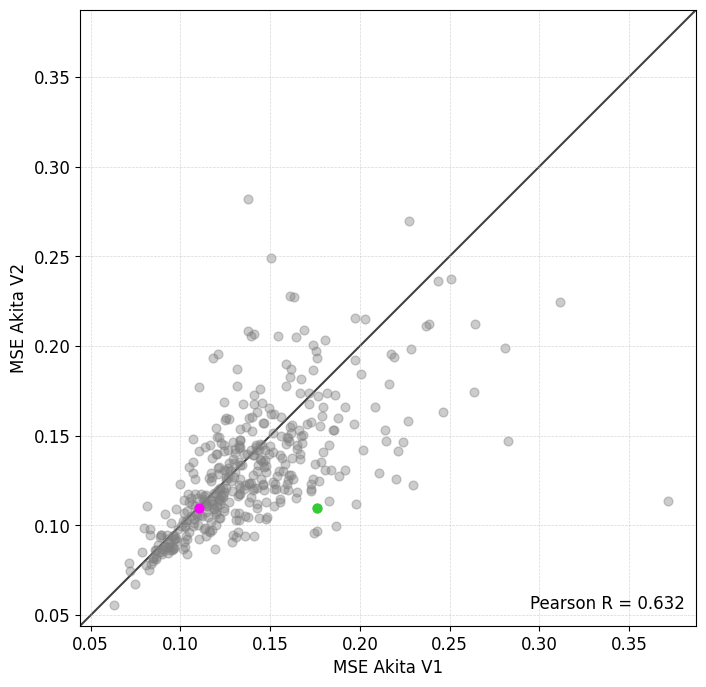

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df["v1_MSE"], df["v2_MSE"], alpha=0.4, s=40, edgecolors='grey', c='grey')

ax.scatter(highlight_point_1["v1_MSE"], highlight_point_1["v2_MSE"], edgecolors="magenta", color="magenta", s=40)
ax.scatter(highlight_point_2["v1_MSE"], highlight_point_2["v2_MSE"], edgecolors="limegreen", color="limegreen", s=40)

pearson_corr = stats.pearsonr(df["v1_MSE"], df["v2_MSE"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel("MSE Akita V1")
ax.set_ylabel("MSE Akita V2")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Adding text in the upper left corner
# plt.text(x=0.05, y=0.95, s=f"Pearson R = {rounded_pearson_corr}", transform=plt.gca().transAxes, verticalalignment='top')
plt.text(x=0.73, y=0.05, s=f"Pearson R = {rounded_pearson_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/mse_vs_mse_akita_v1_v2.pdf", format="pdf", bbox_inches="tight")

plt.show()

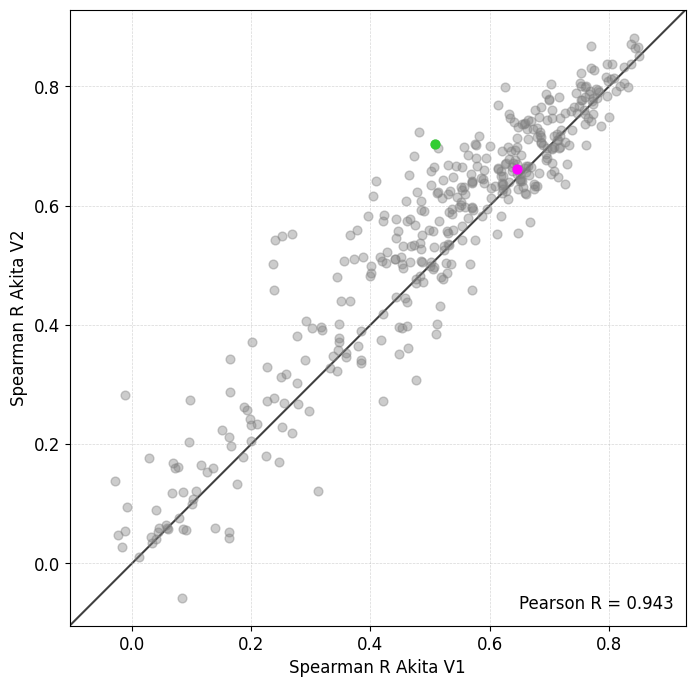

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df["v1_S"], df["v2_S"], alpha=0.4, s=40, edgecolors='grey', c='grey')

ax.scatter(highlight_point_1["v1_S"], highlight_point_1["v2_S"],  edgecolors="magenta", color="magenta", s=40)
ax.scatter(highlight_point_2["v1_S"], highlight_point_2["v2_S"], edgecolors="limegreen", color="limegreen", s=40)

pearson_corr = stats.pearsonr(df["v1_S"], df["v2_S"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel("Spearman R Akita V1")
ax.set_ylabel("Spearman R Akita V2")

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

# Adding text in the upper left corner
# plt.text(x=0.05, y=0.95, s=f"Pearson R = {rounded_pearson_corr}", transform=plt.gca().transAxes, verticalalignment='top')
plt.text(x=0.73, y=0.05, s=f"Pearson R = {rounded_pearson_corr}", transform=plt.gca().transAxes, verticalalignment='top')

# plt.savefig("./plots/spearman_vs_spearman_akita_v1_v2.pdf", format="pdf", bbox_inches="tight")
plt.show()